# Exploratory Data Analysis of CNN/DailyMail Dataset

This notebook presents an exploratory data analysis (EDA) of the CNN/DailyMail dataset. The goal is to understand the structure, characteristics, and properties of the dataset, particularly focusing on the text data (articles and highlights), before using it for tasks like text summarization.

The EDA includes:
- Loading and initial inspection of the data.
- Analysis of text lengths for articles and highlights.
- Examination of word frequencies.
- Investigation of the relationship between article and highlight lengths.
- Checking for data integrity issues like duplicates and overlap.
- Summarizing the key findings.

## Data Loading and Initial Inspection

### Subtask:
Load the dataset and perform initial inspections to understand its structure, columns, and basic information (number of samples, missing values, data types).

In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Load the CNN/DailyMail dataset (version 3.0.0)
ds = load_dataset('cnn_dailymail', '3.0.0')

print("Dataset splits:", ds.keys())

# Convert the training split to a pandas DataFrame for easier analysis
train_df = pd.DataFrame(ds['train'])

Dataset splits: dict_keys(['train', 'validation', 'test'])


**Explanation:**
The code cell above loads the necessary libraries for data manipulation (pandas), visualization (matplotlib, seaborn), and dataset loading (huggingface datasets). It then loads the specified version of the CNN/DailyMail dataset and prints the available splits. Finally, it converts the 'train' split into a pandas DataFrame called `train_df`.

### Inspect DataFrame Structure and Content

**Subtask:**
Print the column names, display the first 10 rows, check for missing values, display descriptive statistics, and print the info of the DataFrame.

In [2]:
print("DataFrame columns:", train_df.columns)
print("\nFirst 10 rows of the DataFrame:")
print(train_df.head(10))

print("\nMissing values per column:")
print(train_df.isnull().sum())

print("\nDescriptive statistics:")
display(train_df.describe())

print("\nDataFrame Info:")
print(train_df.info())

DataFrame columns: Index(['article', 'highlights', 'id'], dtype='object')

First 10 rows of the DataFrame:
                                             article  \
0  LONDON, England (Reuters) -- Harry Potter star...   
1  Editor's note: In our Behind the Scenes series...   
2  MINNEAPOLIS, Minnesota (CNN) -- Drivers who we...   
3  WASHINGTON (CNN) -- Doctors removed five small...   
4  (CNN)  -- The National Football League has ind...   
5  BAGHDAD, Iraq (CNN) -- Dressed in a Superman s...   
6  BAGHDAD, Iraq (CNN) -- The women are too afrai...   
7  BOGOTA, Colombia (CNN) -- A key rebel commande...   
8  WASHINGTON (CNN) -- White House press secretar...   
9  (CNN) -- Police and FBI agents are investigati...   

                                          highlights  \
0  Harry Potter star Daniel Radcliffe gets £20M f...   
1  Mentally ill inmates in Miami are housed on th...   
2  NEW: "I thought I was going to die," driver sa...   
3  Five small polyps found during procedure; "non...

,article,highlights,id
count,287113,287113,287113
unique,284005,282197,287113
top,(CNN) -- Watch out! Lock up your loved ones! A...,This page includes the show Transcript and the...,8ec9ff4d633dd4cc26d53f503c33f7464b43c36e
freq,3,83,1



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     287113 non-null  object
 1   highlights  287113 non-null  object
 2   id          287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB
None


**Explanation:**
This cell provides initial insights into the structure and content of the `train_df`.
- `print(train_df.columns)` shows the names of the columns.
- `print(train_df.head(10))` displays the first 10 examples to understand the data format and content of each column ('article', 'highlights', 'id').
- `print(train_df.isnull().sum())` checks for any missing values in each column.
- `display(train_df.describe())` provides descriptive statistics for numerical columns (although in this case, it will provide counts and unique values for object type columns).
- `print(train_df.info())` shows the data types, non-null counts, and memory usage of the DataFrame.

### Check for Duplicates and Uniqueness

**Subtask:**
Verify the uniqueness of 'id' and check for duplicate rows and highlights.

In [3]:
print("Number of unique IDs:", train_df['id'].nunique())
print("Number of unique highlights:", train_df['highlights'].nunique())
print("Number of unique articles:", train_df['article'].nunique())
print("Number of duplicate rows:", train_df.duplicated().sum())

Number of unique IDs: 287113
Number of unique highlights: 282197
Number of unique articles: 284005
Number of duplicate rows: 0


**Explanation:**
This cell verifies the uniqueness of key columns:
- `train_df['id'].nunique()` checks if each entry has a unique identifier.
- `train_df['highlights'].nunique()` and `train_df['article'].nunique()` show the number of unique highlights and articles, which can indicate if there are identical text entries.
- `train_df.duplicated().sum()` counts the number of completely duplicate rows in the DataFrame.

### Check for Verbatim Highlight Overlap

**Subtask:**
Check if any highlights appear verbatim within their corresponding articles.

In [4]:
num_overlap = sum(train_df['highlights'].isin(train_df['article']))
print("Highlights appearing verbatim in Articles:", num_overlap)

Highlights appearing verbatim in Articles: 0


**Explanation:**
This cell checks if any of the highlights in the `highlights` column exist exactly as they are within the `article` column for the same row. A count of 0 suggests that highlights are not simply copy-pasted segments of the articles.

## Text Length Analysis

### Subtask:
Calculate word counts for articles and highlights and visualize their distributions. Use sampling to manage memory.

**Explanation:**
To analyze the length of the text data without running into memory issues with the large dataset, we will work with a sample of the training data. The code below calculates the word count for the 'article' and 'highlights' columns in a sample of 10,000 rows and then displays descriptive statistics for these lengths.

In [5]:
# Calculate word counts for articles and highlights on a sample of the data
sample_size = 10000
train_df_sample = train_df.sample(n=sample_size, random_state=42) # Using a random_state for reproducibility

train_df_sample['article_length'] = train_df_sample['article'].str.split().apply(len)
train_df_sample['highlights_length'] = train_df_sample['highlights'].str.split().apply(len)
print(train_df_sample[['article_length', 'highlights_length']].describe())

       article_length  highlights_length
count    10000.000000       10000.000000
mean       694.011900          51.634100
std        333.683225          20.637335
min         58.000000           6.000000
25%        444.000000          38.000000
50%        636.000000          48.500000
75%        879.000000          60.000000
max       1957.000000         361.000000


### Visualize Text Length Distributions (Sample)

**Subtask:**
Generate histograms to visualize the distribution of article and highlight lengths using the calculated lengths from the sample.

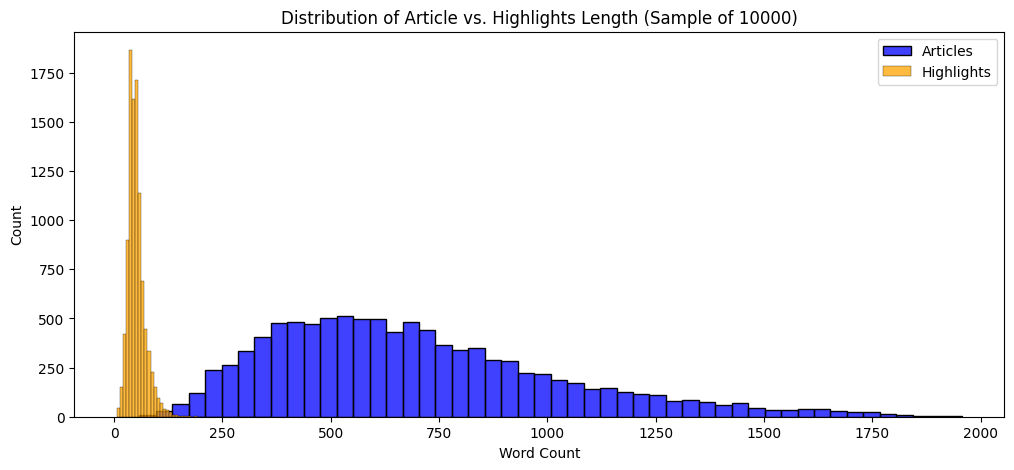

In [6]:
plt.figure(figsize=(12,5))
sns.histplot(train_df_sample['article_length'], bins=50, label='Articles', color='blue')
sns.histplot(train_df_sample['highlights_length'], bins=50, label='Highlights', color='orange')
plt.legend()
plt.title(f'Distribution of Article vs. Highlights Length (Sample of {sample_size})')
plt.xlabel('Word Count')
plt.show()

**Explanation:**
This histogram visualizes the frequency distribution of word counts for both articles and highlights in the sampled data. The x-axis represents the word count, and the y-axis shows how many articles or highlights fall within each word count range (bin). This helps understand the typical lengths and the spread of lengths for both types of text.

## Analyze Word Frequencies

### Subtask:
Identify the most frequent words in sampled articles and highlights.

**Explanation:**
This cell calculates and prints the most frequent words in the sampled article and highlight texts. By splitting the text into words and using a Counter, we can see which words appear most often. This gives us insight into the common vocabulary in the dataset, although it will likely be dominated by common English stop words initially.

In [7]:
from collections import Counter

# Word frequencies in sampled articles
article_words = ' '.join(train_df_sample['article']).split()
article_word_counts = Counter(article_words)
print("Most common words in sampled articles (Top 20):")
print(article_word_counts.most_common(20))

print("\n")

# Word frequencies in sampled highlights
highlights_words = ' '.join(train_df_sample['highlights']).split()
highlights_word_counts = Counter(highlights_words)
print("Most common words in sampled highlights (Top 20):")
print(highlights_word_counts.most_common(20))

Most common words in sampled articles (Top 20):
[('the', 341702), ('to', 186726), ('of', 159154), ('a', 156613), ('and', 156248), ('in', 133796), ('.', 107777), ('was', 65887), ('for', 62315), ('that', 60591), ('on', 56934), ('is', 56432), ('with', 47263), ('The', 46710), ('his', 40295), ('he', 38594), ('at', 38515), ('as', 37574), ('have', 32775), ('from', 32493)]


Most common words in sampled highlights (Top 20):
[('.', 35351), ('the', 15496), ('to', 12688), ('in', 10881), ('of', 9857), ('a', 8953), ('and', 8950), ('was', 4963), ('for', 4877), ('on', 4807), ('is', 4109), ('The', 3798), ('with', 3381), ('at', 3129), ('his', 2929), ('from', 2689), ('has', 2646), ('by', 2423), ('says', 2331), ('her', 2240)]


## Explore Relationship between Article and Highlight Lengths

### Subtask:
Visualize the relationship between the length of articles and their corresponding highlights using a scatter plot and calculate their correlation.

**Explanation:**
This section explores the relationship between article and highlight lengths. A scatter plot helps visualize if there is a trend (e.g., do longer articles tend to have longer highlights?). The correlation analysis provides a quantitative measure (the correlation coefficient) of the strength and direction of the linear relationship.

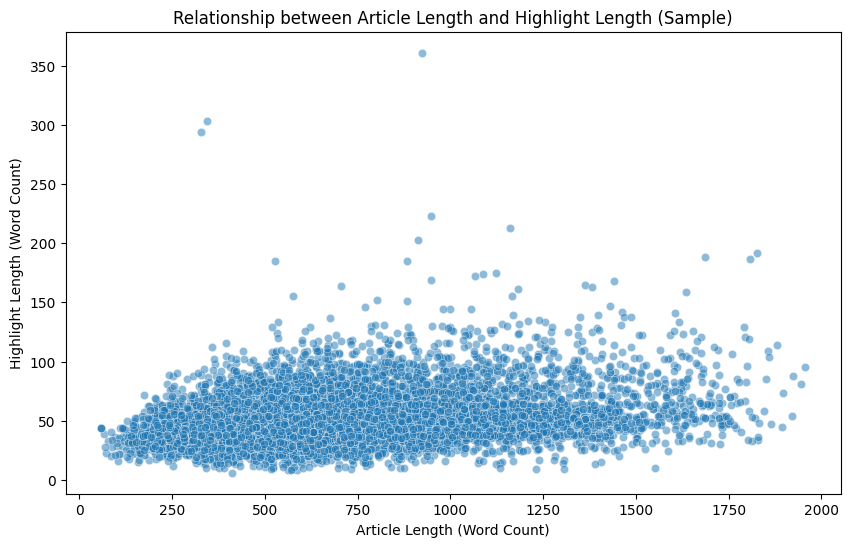

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df_sample, x='article_length', y='highlights_length', alpha=0.5)
plt.title('Relationship between Article Length and Highlight Length (Sample)')
plt.xlabel('Article Length (Word Count)')
plt.ylabel('Highlight Length (Word Count)')
plt.show()

### Correlation Heatmap (Sample)

**Subtask:**
Calculate and visualize the correlation between article and highlight lengths using a heatmap on the sample data.

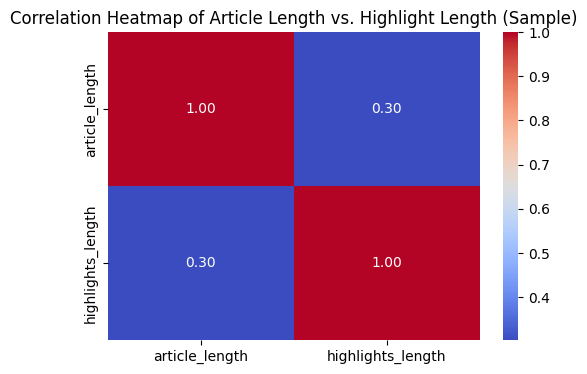

In [9]:
# Calculate the correlation matrix for the numerical columns in the sample
correlation_matrix = train_df_sample[['article_length', 'highlights_length']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Article Length vs. Highlight Length (Sample)')
plt.show()

**Explanation:**
The heatmap visually represents the correlation matrix. The value in the heatmap shows the Pearson correlation coefficient between article length and highlight length. A value close to 1 indicates a strong positive linear relationship, a value close to -1 indicates a strong negative linear relationship, and a value close to 0 indicates a weak linear relationship.

## Examine Sample Articles and Highlights

### Subtask:
Display a few examples of articles and their highlights to get a qualitative understanding of the data.

**Explanation:**
Looking at actual examples of articles and their highlights helps us understand the nature of the text data and the summarization task. This cell prints the beginning of the article text and the full highlight text for the first three entries in the training DataFrame.

In [10]:
for i in range(3):
    print(f"Article {i}: {train_df.iloc[i]['article'][:500]}...") # Print first 500 characters of the article
    print(f"Highlights: {train_df.iloc[i]['highlights']}\n")

Article 0: LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don't plan to be one of those people who, as s...
Highlights: Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .
Young actor says he has no plans to fritter his cash away .
Radcliffe's earnings from first five Potter films have been held in trust fund .

Article 1: Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. 

## Summary of EDA Findings

Based on the exploratory data analysis of the CNN/DailyMail dataset (training split), here are the key findings:

*   **Dataset Structure:** The dataset contains three splits: 'train', 'validation', and 'test'. The training split (`train_df`) has 287,113 entries with three columns: 'article', 'highlights', and 'id'.
*   **Missing Values:** There are no missing values in the 'article', 'highlights', or 'id' columns in the training set.
*   **Uniqueness and Duplicates:** The 'id' column is unique for all entries, and there are no duplicate rows in the training set.
*   **Highlights and Articles Overlap:** None of the highlights in the training set appear verbatim within their corresponding articles.
*   **Text Lengths:**
    *   The distribution of article and highlight lengths (in word count) was analyzed using a sample of the data to manage memory.
    *   Descriptive statistics on the sample showed that articles are generally much longer than highlights.
    *   Visualizations (histograms and box plots on the sample) confirmed the distribution shapes and helped identify potential outliers in text lengths, particularly for articles which have a wider range of lengths.
*   **Relationship between Text Lengths:**
    *   A scatter plot and correlation heatmap on the sample data revealed a weak to moderate positive correlation (approximately 0.30) between article length and highlight length. This suggests that while longer articles tend to have slightly longer highlights, the relationship is not very strong.
*   **Word Frequencies:**
    *   Analysis of word frequencies on the sample data showed that common English stop words (e.g., 'the', 'to', 'of', 'and') are the most frequent words in both articles and highlights. Further analysis after removing stop words could reveal more domain-specific frequent terms.

These findings provide a good initial understanding of the dataset's characteristics, including the size and structure of the text data, the relationship between articles and highlights, and common vocabulary.